# Pepper Mining - Quickstart


In this tutorial you will have a journey about the main features available in Pepper Mining.

Therefore, for a more detailed overview of process mining, we recommend looking at the [Coursera MOOC](https://www.coursera.org/learn/process-mining) on [Process Mining and the seminal book of Wil van der Aalst](https://link.springer.com/book/10.1007/978-3-662-49851-4). Furthermore, before you begin, please install Pepper Mining on your system, i.e., as described in the Installation section.

## Installation

The Pepper Mining installation is very easy and used only 4 Python libraries.

For more details about the Pepper Mining requirements, see too the [setup.py](https://github.com/ThoberDetofeno/peppermining/blob/main/setup.py)

In [1]:
!pip install peppermining

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.9 MB/s eta 0:00:00


## Data preparation

In the remainder of this tutorial, we will use an oftenly used dummy example event log to explain the basic process mining operations. The process that we are considering is a simplified process related to customer complaint handling, i.e., taken from the book of van der Aalst. 

The process, and the event data we are going to use, looks as follows.

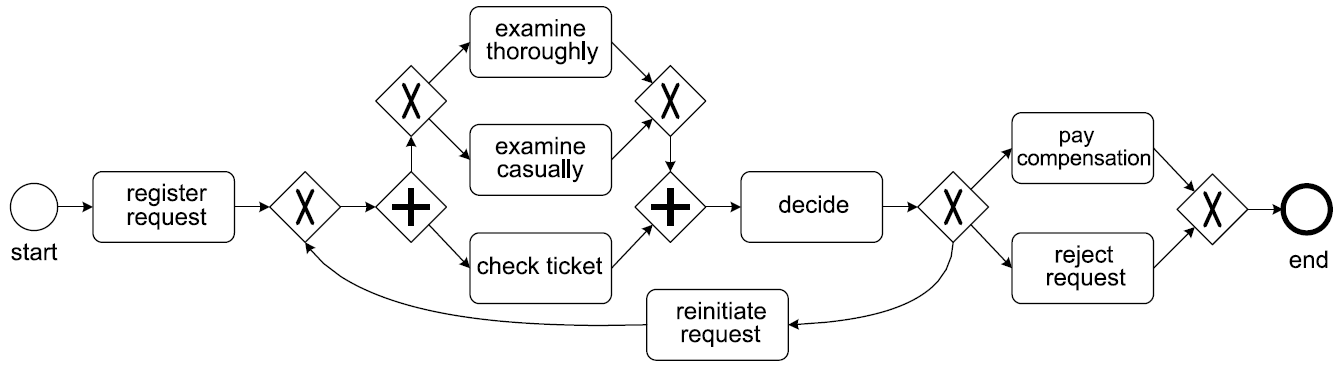

We have prepared a small sample event log, containing behavior similar equal to the process model. The samples we are using in this example contain 8 Cases and 52 Event log.

Observe that, the arrow black in the picture below describe the Case and the arrow colorful are Event log. The Case contain two information, first a number that represent the case_id and second is a attribute with Product name. Each Event log contain the case_id, activity name, timestamp that start the activity, and resource that executed the activity. 

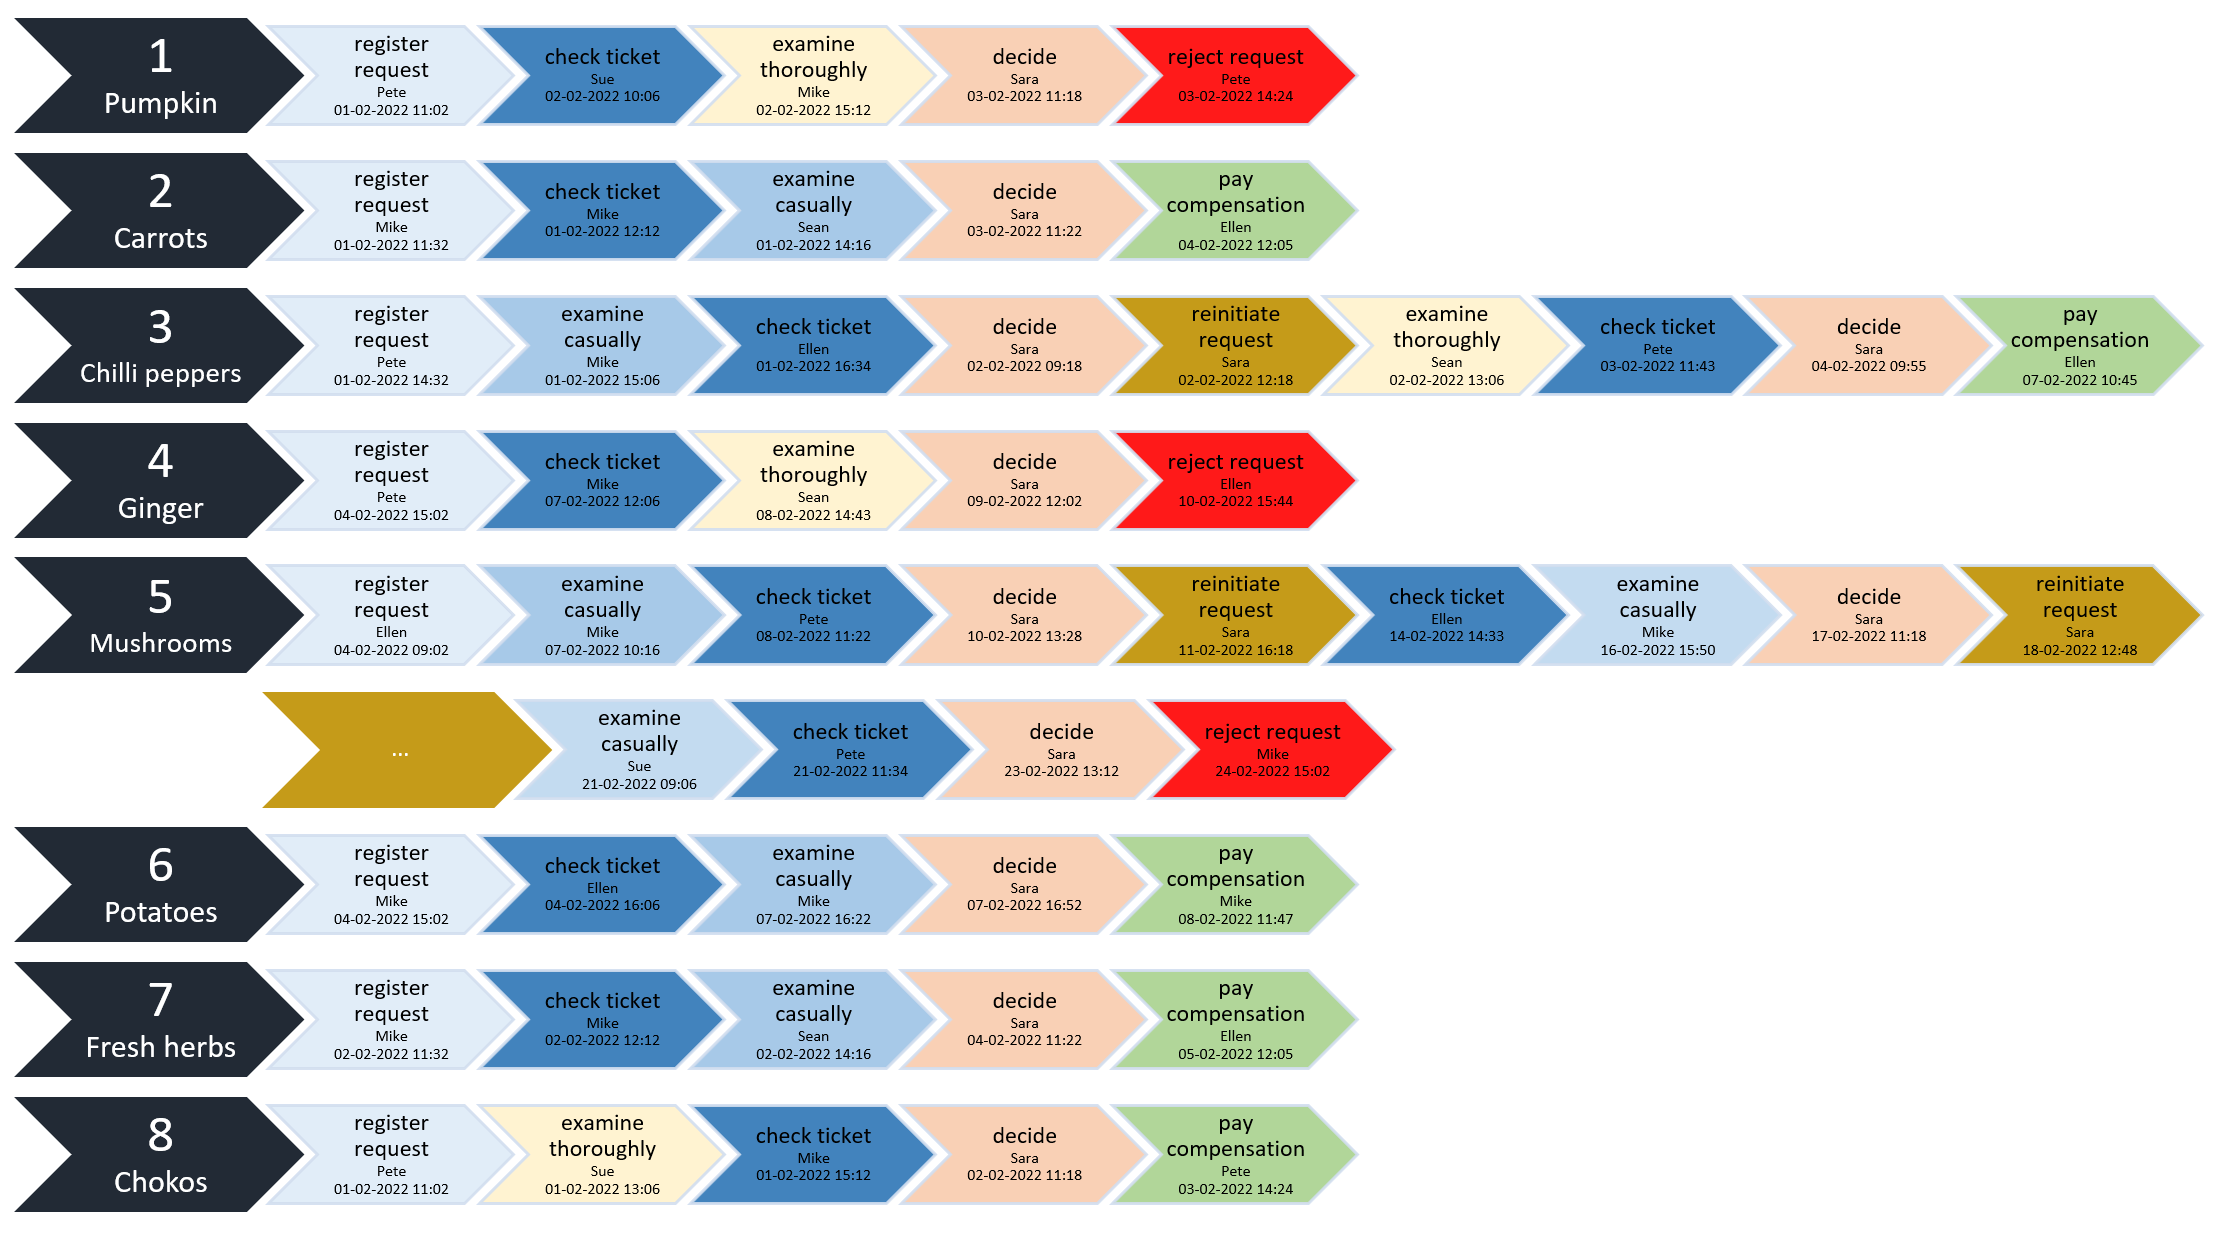

One of the characteristics of Pepper Mining is that the Event log is mandatory, but is possible to add the Cases information in separated. In this way, is possibible to add informations that represent all event logs and can be using with more performance in the filter operations or compliance analysis.
The data this tutorial is available in CSV format, on the links below:

Cases: 'https://raw.githubusercontent.com/ThoberDetofeno/peppermining/main/tests/data/case-example.csv'

Event log: 'https://raw.githubusercontent.com/ThoberDetofeno/peppermining/main/tests/data/eventlog-example.csv'

## Creating a Pepper Mining analysis

Pepper Mining analysis is the beginning of all things. When creating the PepperMining object we are creating a Pepper Mining analysis.
The first step is creating a PepperMining object, the next step is to add data from Event Logs and Cases.

After these two first steps are possible to visualize, filter and to do all operations in Pepper Mining.



In [2]:
import peppermining as pm
# First step: Create Pepper analysis
pepper = pm.PepperMining()
# Second step: Add Event log and Case data
pepper.read_event_log_csv('https://raw.githubusercontent.com/ThoberDetofeno/peppermining/main/tests/data/eventlog-example.csv')
pepper.read_cases_csv('https://raw.githubusercontent.com/ThoberDetofeno/peppermining/main/tests/data/case-example.csv')

## Basic data visualizations

In this section the basic visualizations of the data added in Pepper Mining. 

The basic views are: Event log, Cases, Activities and graph of event data.

In [ ]:
# Return Event logs data
pepper.get_event_log()

In [ ]:
# Return Cases data
pepper.get_cases()

In [ ]:
# Return Activities data
pepper.get_activities()

Return the activities with interaction graph of event data. Return a graph using pydot objects. It is same the Spaghetti process. 

In [ ]:
# Return the pydot object
graph = pepper.drawing()
# Create a image 
graph.write_png('output.png')
# Render the png file.
from IPython.display import Image
Image('output.png')

## Filtering

Filtering is the restriction of the Pepper Mining analysis (Event log and Case) to a subset of the behavior.

After filtering the return object it have all behavior that Pepper Mining analysis. Because, de Pepper Filter is a inheritance of Pepper Mining.

It is possible to do a hierarchy of filters, because each filter is a object.
This way the user can make "n" filters and return to last step without losing the performance of the software.


The first filter is select all Event Logs that ended with activity 'pay compensation'. For this, let's create the CaseEndActivityFilter object.

In [8]:
# Filter on end activities of Pepper Mining analysis
filter_1 = pm.CaseEndActivityFilter(pepper, ['pay compensation'])
filter_1.get_cases()

,case_id,product
1,2,Carrots
2,3,Chilli peppers
5,6,Potatoes
6,7,Fresh herbs
7,8,Chokos


For the second filter, let's use the previous filter result. Now we want to view all events except the 7 and 8 cases. For this,  let's create the CaseFilter object with the parameter 'not contain'.

In [9]:
# Case Filter of Pepper Filter (CaseEndActivityFilter)
filter_2 = pm.CaseFilter(filter_1, [3, 8], 'not contain')
filter_2.get_cases()

,case_id,product
1,2,Carrots
5,6,Potatoes
6,7,Fresh herbs


To finish this section, we show the filters used in second filter.

In [10]:
# Visualize the filter used in second filter
filter_2.get_filter()

'[None] [Filter by END activity (pay compensation)] [Filter by case not(2 cases)]'

## Variant Explorer

Variant Explorer is a analysis tool that helps you explore how a specific process flows through your organization, in the words, see all the different ways the process flows in your organization.

In the Pepper Mining is possible to see the variant list of a Pepper Mining analysis or Pepper Filter.



Firstly, we gonna using the Pepper Mining analysis to show the variant lists. The method get_variant return 3 main informations: a key that is an identifier for variant, a list of cases and a list of activities that represent each variant.

In this example, about customer complaint handling, we have 5 variants. The image below show the activities sequence of each variant.

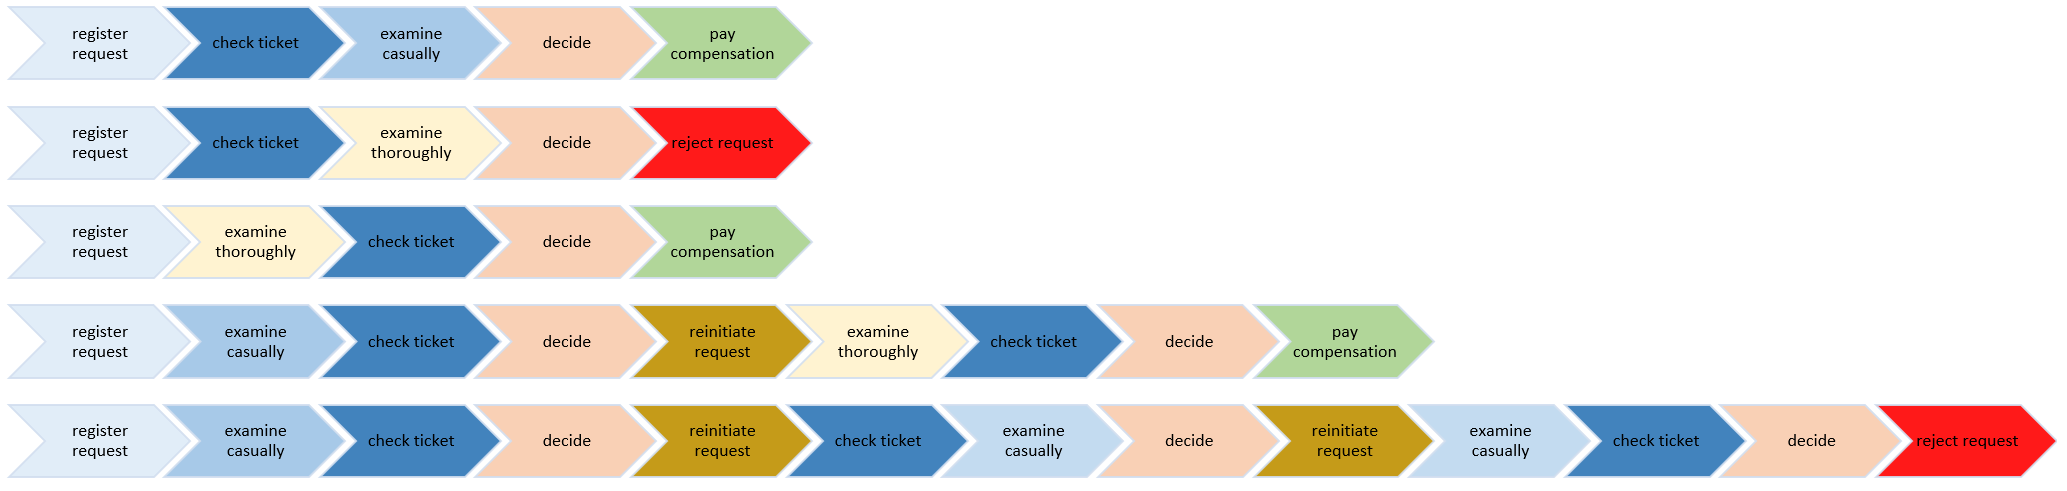

In [ ]:
# Variants of a Pepper Mining analysis
pepper.get_variants()

In the second example, we used the Pepper Filter object to view the Variant lists.

In [12]:
# Variants of a Pepper Filter
filter_2.get_variants()

,key,cases,activities
0,register request->check ticket->examine casual...,"[2, 6, 7]","[register request, check ticket, examine casua..."


It is very common visualize the graph of specific variants. To show the graph of 2 variants, we gonna creating a variant filter and after view the graph.

In [13]:
# Variant filter
variant_list = ['register request->check ticket->examine casually->decide->pay compensation',
                'register request->examine thoroughly->check ticket->decide->pay compensation']
variants = pm.VariantFilter(pepper, variant_list)

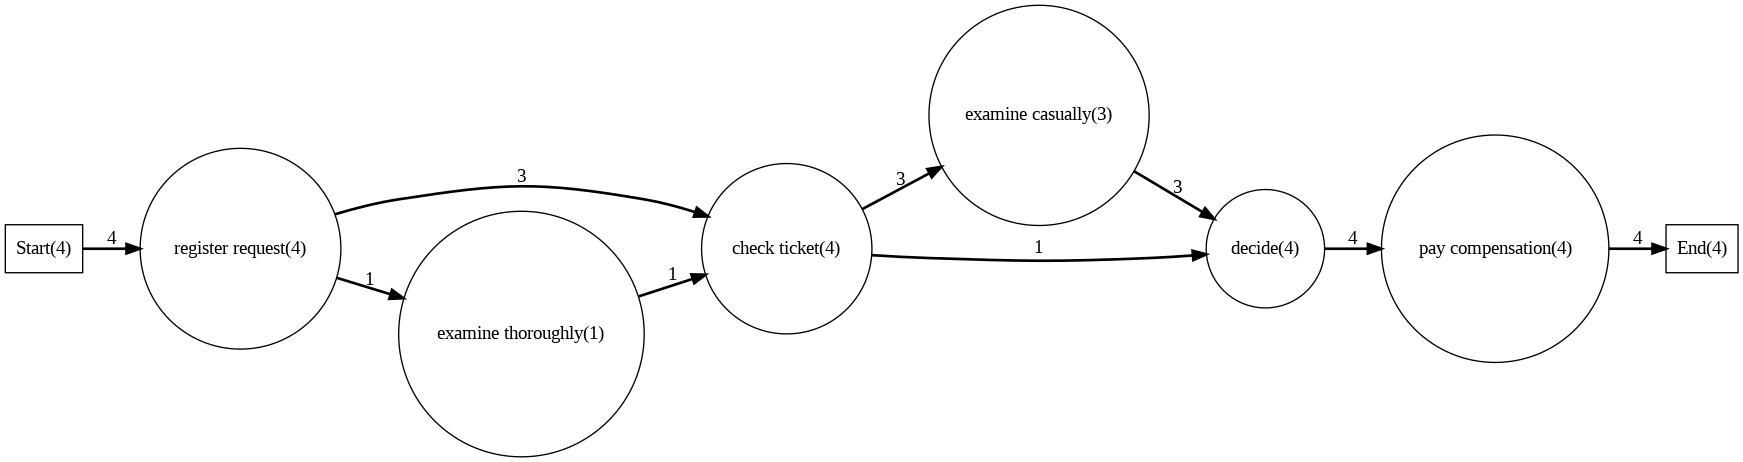

In [11]:
# Create a image 
variants.drawing().write_png('output.png')
# Render the png file.
from IPython.display import Image
Image('output.png')

## KPIs and Statistics

In Pepper Mining, it is possible to calculate different statistics and KPI in all modules. It can be used in the objects Pepper Mining analysis, Pepper Filter, and Conformance checking.

Is possible to user the KPIs of two way.

In the first situation you have a Pepper Analysis or Filter objects and to want adding the KPIs.



In [ ]:
# Return case datas with KPIs
pepper.get_cases(['NumberOfEvents', 'NumberOfActivities'])

In [ ]:
# Return activities datas with KPIs
pepper.get_activities(['NumberOfCases', 'Rework'])

In [16]:
# Return variant datas with KPIs
pepper.get_variants(['NumberOfEvents', 'NumberOfActivities', 'NumberOfCases'])

,key,cases,activities,NumberOfEvents,NumberOfActivities,NumberOfCases
0,check ticket->examine casually->decide->reinit...,[5],"[check ticket, examine casually, decide, reini...",13,13,1
1,register request->check ticket->examine casual...,"[2, 6, 7]","[register request, check ticket, examine casua...",15,5,3
2,register request->check ticket->examine thorou...,"[1, 4]","[register request, check ticket, examine thoro...",10,5,2
3,register request->examine casually->check tick...,[3],"[register request, examine casually, check tic...",9,9,1
4,register request->examine thoroughly->check ti...,[8],"[register request, examine thoroughly, check t...",5,5,1


In [17]:
# Return summary the events and cases.
pepper.get_summary(['NumberOfEvents', 'NumberOfActivities', 'NumberOfCases', 'AverageEventsPerCase', 'Rework'])

,KPI,Value
Rework,Rework,9.0
AverageEventsPerCase,Average events per case,6.5
NumberOfCases,Number of cases,8.0
NumberOfActivities,Number of activities,8.0
NumberOfEvents,Number of events,52.0


Another way is creating the Pepper KPI object and add the Pepper Analysis or Pepper Filter.

In [18]:
kp1 = pm.NumberOfCases(filter_1)
# Summary
kp1.get_kpi()

,KPI,Value
NumberOfCases,Number of cases,5


In [19]:
# get_kpi_variants
kp1.get_kpi_variants()

,key,NumberOfCases
0,register request->check ticket->examine casual...,3
1,register request->examine casually->check tick...,1
2,register request->examine thoroughly->check ti...,1


In [20]:
# Return KPI value per day, it is important to line charts
kp1.get_kpi_per_day()

year  month  day
2022  1      2      3
      2      2      1
      4      2      1
Name: day, dtype: int64

I´d like to show the KPI **Throughput time.**

Throughput time is the actual time an activity takes to be done. This includes the entire duration from start to end of the activity,
which in many cases means the time a factory needs to convert raw materials into finished goods.
Given an event log, it is possible to retrieve the list of all the durations of the cases (expressed in seconds).

In [21]:
# Throughput time per case
pepper.get_cases(['ThroughputTime'])

,case_id,product,ThroughputTime
0,1,Pumpkin,74280
1,2,Carrots,84420
2,3,Chilli peppers,13620
3,4,Ginger,83880
4,5,Mushrooms,80100
5,6,Potatoes,11700
6,7,Fresh herbs,84420
7,8,Chokos,74280


In [22]:
# Summary with Throughput time
pepper.get_summary(['ThroughputTime'])

,KPI,Value
ThroughputTimeMax,Throughput time (Max),84420.000000
ThroughputTimeMin,Throughput time (Min),11700.000000
ThroughputTimeMean,Throughput time (Mean),63337.500000
ThroughputTimeMedian,Throughput time (Median),77190.000000
ThroughputTimeSum,Throughput time (Sum),506700.000000
ThroughputTimeStDev,Throughput time (StDev),31554.164656


In [23]:
# Throughput time per variant
kp2 = pm.ThroughputTime(pepper)
kp2.get_kpi_variants()

,key,ThroughputTimeMin,ThroughputTimeMax,ThroughputTimeMean,ThroughputTimeMedian,ThroughputTimeSum,ThroughputTimeStDev
0,check ticket->examine casually->decide->reinit...,80100,80100,80100.0,80100.0,80100,None
1,register request->check ticket->examine casual...,11700,84420,60180.0,84420.0,180540,41984.911575
2,register request->check ticket->examine thorou...,74280,83880,79080.0,79080.0,158160,6788.225099
3,register request->examine casually->check tick...,13620,13620,13620.0,13620.0,13620,None
4,register request->examine thoroughly->check ti...,74280,74280,74280.0,74280.0,74280,None


## Conformance Checking

The conformance checker allows you to automatically compare a reference process model with the actual process flows discovered from the data. Then, we need a process model to compare with Pepper Mining analysis, and after this we will have the Conformance and Violations.


This section will have 3 steps: Definition of Process model, Conformance analysis and Violations.

**1. Definition of Process Model.**

Process Model represent the ideal model that used in the identification of validations and conformance. For our example, the process below represent the a Process Model.

In the Pepper Mining for each process should be creating a object ProcessModel.

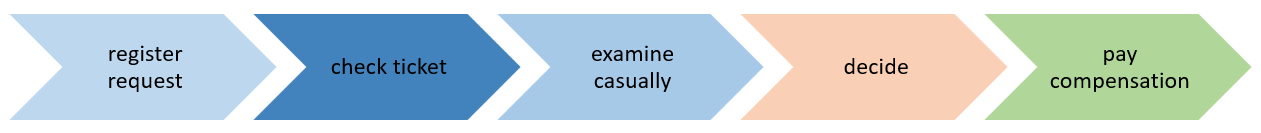

In [ ]:
# Create the object ProcessModel
model_1 = pm.ProcessModel()
# Read the event log that represent the a ideal process.
model_1.read_process_model_csv('https://raw.githubusercontent.com/ThoberDetofeno/peppermining/main/tests/data/processmodel-example.csv')
# Return the process model data
model_1.get_process_model()

**2. Conformance Analysis**

The difference between the model and actual flows is returned in the dataframe with a diagnostics column.

In [30]:
# Create the object to conformance analysis
con_analysis = pm.Conformance(pepper, model_1)

In [ ]:
# Return all cases that are in conformance with models.
con_analysis.get_cases()

In [ ]:
# Return Conformance overview data.
con_analysis.get_summary(['NumberOfCases', 'AverageEventsPerCase', 'ThroughputTime'])

In [ ]:
# Return the diagnostic per case.
con_analysis.diagnostics()

**3. Violations**

Pepper violation has various specific methods to discovery the violation of an event log. In the Pepper Mining each violations has a class that can be analysed on demand.

In this section, we are showing three violations.
1. Undesired Activity:

In [37]:
v1 = pm.UndesiredActivity(pepper, model_1)
v1.get_violation()

,type,name,activity,cases
0,UndesiredActivity,"""reject request"" is an undesired activity",[reject request],"[1, 4, 5]"
1,UndesiredActivity,"""reinitiate request"" is an undesired activity",[reinitiate request],"[3, 5]"
2,UndesiredActivity,"""examine thoroughly"" is an undesired activity",[examine thoroughly],"[1, 3, 4, 8]"


2. Undesired Connection:

In [38]:
v2 = pm.UndesiredConnection(pepper, model_1)
v2.get_violation()

,type,name,activity,cases
0,UndesiredConnection,register request is followed by examine casually,"[register request, examine casually]","[3, 5]"
1,UndesiredConnection,examine casually is followed by check ticket,"[examine casually, check ticket]","[3, 5]"
2,UndesiredConnection,decide is followed by examine casually,"[decide, examine casually]",[5]
3,UndesiredConnection,decide is followed by check ticket,"[decide, check ticket]","[3, 5]"
4,UndesiredConnection,check ticket is followed by decide,"[check ticket, decide]","[1, 3, 4, 5, 8]"


3. Activities executed by the same user:

In [39]:
v3 = pm.RunBySameUser(pepper, ['register request', 'check ticket', 'pay compensation'])
v3.get_violation()

,type,name,activity,cases
0,RunBySameUser,"""Pete"" executed by two different activities",None,"[3, 8]"
1,RunBySameUser,"""Mike"" executed by two different activities",None,"[2, 6, 7]"
2,RunBySameUser,"""Ellen"" executed by two different activities",None,"[3, 5]"


**Root Cause Analysis**

The root cause analysis aims to find process errors and their causes and analyze them.These analyses make it possible to determine the proportion of errors found that have the same cause.

Automated root cause analysis, consisting in analysing the cases attributes and return the most frequent datas.

In [40]:
pm.root_cause_analysis(pepper)

,column,root_cause
0,product,values number_of_case percent_of_...
